In [1]:
%cd C:\Users\yukir\Documents\GitHub\sign_detection\py

C:\Users\yukir\Documents\GitHub\sign_detection\py


In [2]:
from machine_learning import *
from basic_preprocessing import *

In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\study

C:\Users\yukir\Documents\Monicas_workspace\study


### Data load

In [4]:
data_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\'

In [5]:
get_file_list(data_path)

['C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\fragile',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\handle',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\up',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\wet']

In [6]:
categories = ['fragile', 'handle', 'up', 'wet']

In [7]:
data = data_for_ml(categories, data_path, 200)

C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\fragile
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\handle
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\up
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\wet
data수:  688


In [8]:
features, labels = feature_label_maker(data)

features:  688
features ex:  [161 161 161 ... 169 169 169]
feature shape:  (40000,)
-----------------------------
labels:  688
labels ex:  0
labels shape:  (40000,)


In [100]:
for i in categories:
    img_path = data_path+i+'\\'
    print(i, count_img(img_path))

이미지 수 301
fragile None
이미지 수 103
handle None
이미지 수 171
up None
이미지 수 113
wet None


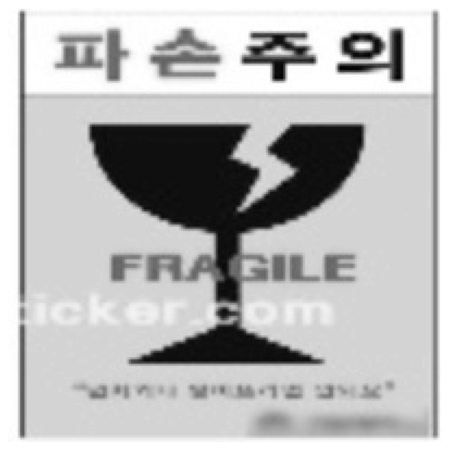

fragile


In [9]:
for_test = features[4]
for_test_img = for_test.reshape(200,200)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [11]:
#이진분류기 훈련
y_train_fragile = (y_train ==0)
y_test_fragile = (y_test ==0)

### train

In [12]:
import sklearn

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [14]:
sgd_clf = sklearn.linear_model.SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_fragile)

SGDClassifier(random_state=42)

### Evaluation model

In [15]:
#confusion matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=3)

confusion_matrix(y_train_fragile, y_train_pred)

array([[221,  97],
       [ 99, 133]], dtype=int64)

In [16]:
#precision , recall, f1-score

print("Precision Score: ", precision_score(y_train_fragile, y_train_pred))
print("Recall Score: ", recall_score(y_train_fragile, y_train_pred))
print("F1-Score: ", f1_score(y_train_fragile, y_train_pred))

Precision Score:  0.5782608695652174
Recall Score:  0.5732758620689655
F1-Score:  0.5757575757575757


### Trade Off

In [17]:
y_scores_test = sgd_clf.decision_function([for_test])
y_scores_test

array([2.17442559e+08])

In [18]:
#분류기 각 샘플의 점수 --> 임계치 확인하는데 사용
# y_scores = sgd_clf.decision_function(X_train)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=5, method = 'decision_function')
len(y_scores)

550

In [19]:
#임계값 설정 안해도 fragile이라 잘 예측한 경우

threshold = 0
y_some_img_prd = (y_scores_test > threshold)
y_some_img_prd

array([ True])

In [20]:
#임계값 설정 안해도 fragile이라 잘 예측한 경우

threshold =0.3
y_some_img_prd = (y_scores_test > threshold)
y_some_img_prd

array([ True])

<AxesSubplot:ylabel='Count'>

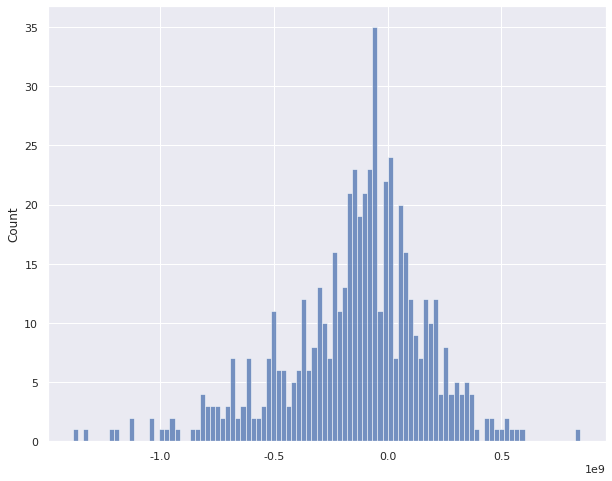

In [103]:
import seaborn
sns.histplot(y_scores.astype('int'), bins=100)

In [104]:
y_scores.astype('int').min()

-1382431333

In [105]:
y_scores.astype('int').max()

846971837

### Evaluation

In [21]:
# 정밀도와 재현율그리기
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_fragile, cv=5, method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_fragile, y_scores)

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label ='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.legend()
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
#     plt.axis([-50000, 50000, 0, 1]) 

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


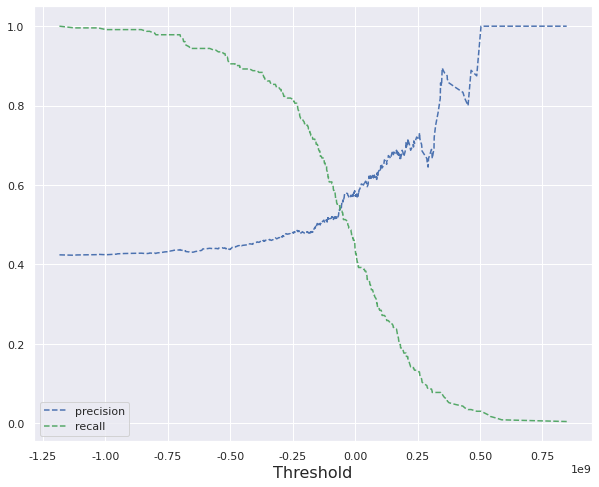

In [23]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

### Trade off

In [127]:
# # precision 90%를 위한 threshold값 구하기
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

print('precision_90_thr : ',threshold_90_precision)
print('recall_90_thr : ',recall_90_precision)

precision_90_thr :  503876725.26527953
recall_90_thr :  0.03017241379310345


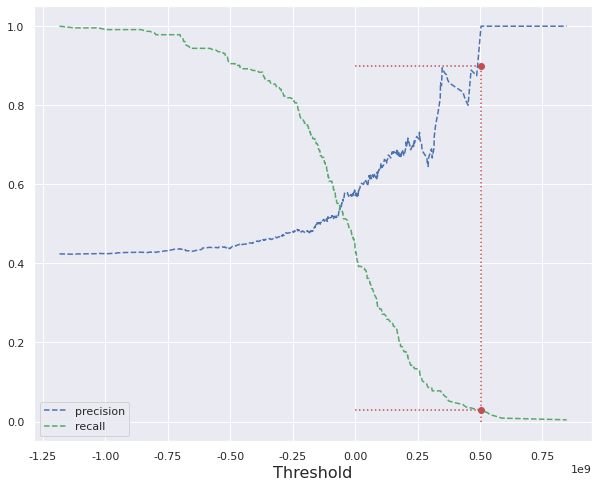

In [24]:
# precision 90%와  recall 90%를 위한 threshold값 구하기(그래프 동시에)

# plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
# save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

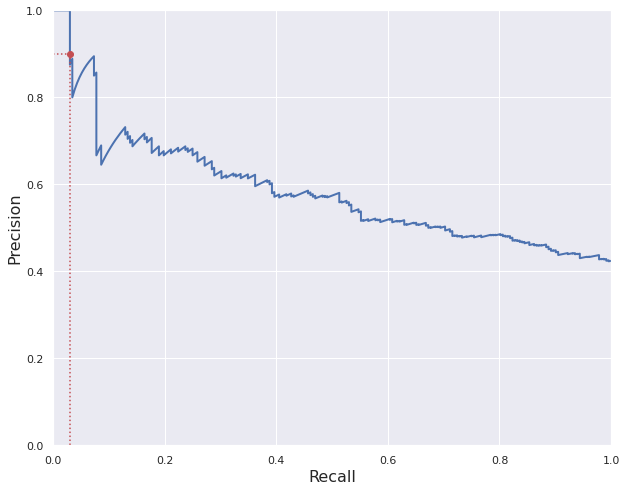

In [25]:
#위 내용과 동일

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16) #재현율
    plt.ylabel("Precision", fontsize=16) #정밀도
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

# precision이 90일때 recall 이 0.03밖에 안됨

### 훈련된 분류기 평가

In [126]:
print('precision_90_thr : ',threshold_90_precision)
print('recall_90_thr : ',recall_90_precision)

precision_90_thr :  503876725.26527953
recall_90_thr :  0.03017241379310345


In [27]:
# 정밀도 90%이상을 위한 분류기
y_train_90 = (y_scores >=threshold_90_precision)

In [28]:
print("Precision Score: ", precision_score(y_train_fragile, y_train_90))
print("Recall Score: ", recall_score(y_train_fragile, y_train_90))

#정밀도 100! 달성, but recall이 너무 낮으면 똥

Precision Score:  1.0
Recall Score:  0.03017241379310345


### ROC곡선

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_fragile, y_scores)

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)   

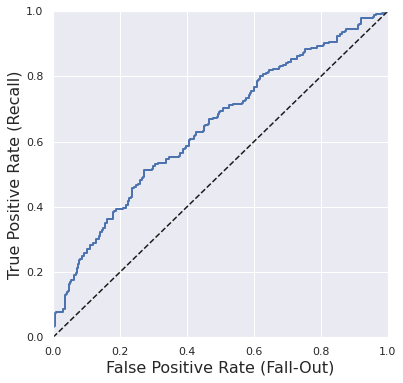

In [31]:
plt.figure(figsize=(6, 6))
plot_roc_curve(fpr, tpr)

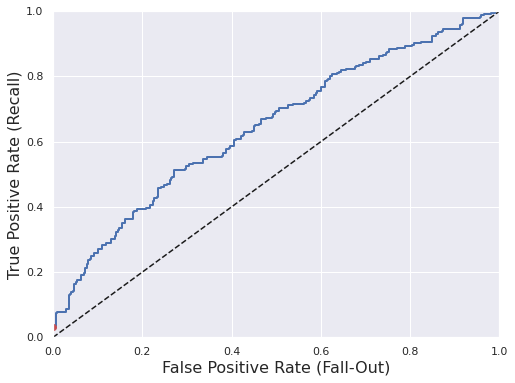

In [96]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [32]:
# 1에 가까워질 수록 좋은 분류기

roc_auc_score(y_train_fragile, y_scores)

0.6440170245066146

#### RF 모델하고 비교해보기

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_fragile, cv=5, method = 'predict_proba')

In [34]:
y_scores_forest = y_probas_forest[:,1] #양성 클래스에 대한 확률을 점수로 사용함
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_fragile, y_scores_forest)

### OvO 모델이랑 비교

In [73]:
ovo_clf = OneVsOneClassifier(SVC(random_state=42))
y_pr_ovo = cross_val_predict(ovo_clf, X_train, y_train_fragile, cv=5, method='decision_function')

In [74]:
fpr_ovo, tpr_ovo, thresholds_ovo = roc_curve(y_train_fragile, y_pr_ovo)

### OvR 모델이랑 비교

In [80]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
y_pr_ovr_score = cross_val_predict(ovr_clf, X_train, y_train_fragile, cv=5, method='decision_function')

In [81]:
fpr_ovr, tpr_ovr, thresholds_ovr = roc_curve(y_train_fragile, y_pr_ovr_score)

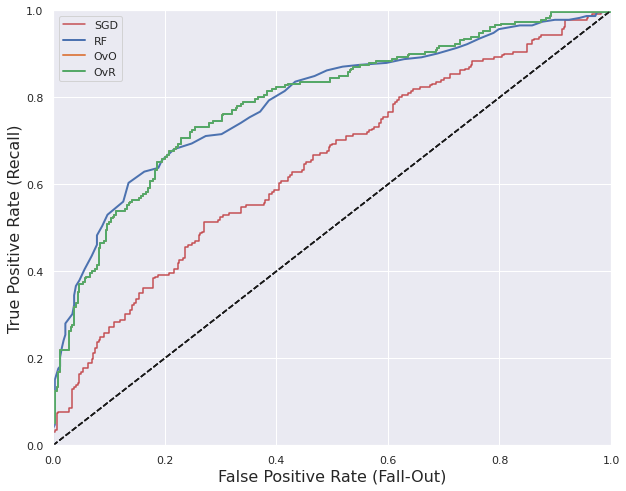

In [82]:
plt.plot(fpr, tpr, 'r', label = 'SGD')
plot_roc_curve(fpr_rf, tpr_rf, "RF")
plot_roc_curve(fpr_ovo, tpr_ovo,'OvO')
plot_roc_curve(fpr_ovr, tpr_ovr,'OvR')
plt.legend()
plt.show()

In [90]:
#RF
# y_train_pred_forest = cross_val_predict(rf_clf, X_train, y_train_fragile, cv=5)
print('(RF)roc_auc',roc_auc_score(y_train_fragile, y_scores_forest))
print("(RF)Precision Score: ", precision_score(y_train_fragile, y_train_pred_forest))
print("(RF)Recall Score: ", recall_score(y_train_fragile, y_train_pred_forest))

(RF)AUC 0.7901214487096074
(RF)Precision Score:  0.7650273224043715
(RF)Recall Score:  0.603448275862069


In [106]:
#OvO
# y_train_pred_ovo = cross_val_predict(ovo_clf, X_train, y_train_fragile, cv=5)
print('(OvO)roc_auc',roc_auc_score(y_train_fragile, y_pr_ovo))
print("(OvO)Precision Score: ", precision_score(y_train_fragile, y_train_pred_ovo))
print("(OvO)Recall Score: ", recall_score(y_train_fragile, y_train_pred_ovo))

(OvO)roc_auc 0.7916395575797007
(OvO)Precision Score:  0.7843137254901961
(OvO)Recall Score:  0.5172413793103449


In [91]:
#OvR
# y_train_pred_ovr = cross_val_predict(ovr_clf, X_train, y_train_fragile, cv=5)
print('(OvR)roc_auc', roc_auc_score(y_train_fragile, y_pr_ovr_score))
print("(OvR)Precision Score: ", precision_score(y_train_fragile, y_train_pred_ovr))
print("(OvR)Recall Score: ", recall_score(y_train_fragile, y_train_pred_ovr))

(OvR)roc_auc 0.7916395575797007
(OvR)Precision Score:  0.7843137254901961
(OvR)Recall Score:  0.5172413793103449


### model training

In [99]:
#RF
rf_clf.fit(X_train, y_train_fragile)

#OvO
ovo_clf.fit(X_train, y_train_fragile)

#OvR
ovr_clf.fit(X_train, y_train_fragile)

OneVsRestClassifier(estimator=SVC(random_state=42))

In [107]:
#모델저장
import joblib

joblib.dump(sgd_clf,'0901_binary_fragile_sgd_644.pkl')
joblib.dump(rf_clf,'0901_binary_fragile_rf_790.pkl')
joblib.dump(ovo_clf,'0901_binary_fragile_ovo_791.pkl')
joblib.dump(ovr_clf,'0901_binary_fragile_ovr_791.pkl')

['0901_binary_fragile_ovr_791.pkl']

In [ ]:
# loaded_model = joblib.load('SGD_binary_fragile_644.pkl')

### test

In [109]:
pred_sgd = sgd_clf.predict(X_test)
score = accuracy_score(y_test_fragile, pred_sgd)
print('accuracy', score)
print(classification_report(y_test_fragile, pred_sgd))

accuracy 0.6739130434782609
              precision    recall  f1-score   support

       False       0.65      0.77      0.70        69
        True       0.71      0.58      0.64        69

    accuracy                           0.67       138
   macro avg       0.68      0.67      0.67       138
weighted avg       0.68      0.67      0.67       138



In [110]:
pred_rf = rf_clf.predict(X_test)
score = accuracy_score(y_test_fragile, pred_rf)
print('accuracy', score)
print(classification_report(y_test_fragile, pred_rf))

accuracy 0.7246376811594203
              precision    recall  f1-score   support

       False       0.67      0.88      0.76        69
        True       0.83      0.57      0.67        69

    accuracy                           0.72       138
   macro avg       0.75      0.72      0.72       138
weighted avg       0.75      0.72      0.72       138



In [111]:
pred_ovo = ovo_clf.predict(X_test)
score = accuracy_score(y_test_fragile, pred_ovo)
print('accuracy', score)
print(classification_report(y_test_fragile, pred_ovo))

accuracy 0.7391304347826086
              precision    recall  f1-score   support

       False       0.67      0.94      0.78        69
        True       0.90      0.54      0.67        69

    accuracy                           0.74       138
   macro avg       0.79      0.74      0.73       138
weighted avg       0.79      0.74      0.73       138



In [112]:
pred_ovr = ovr_clf.predict(X_test)
score = accuracy_score(y_test_fragile, pred_ovr)
print('accuracy', score)
print(classification_report(y_test_fragile, pred_ovr))

accuracy 0.7391304347826086
              precision    recall  f1-score   support

       False       0.67      0.94      0.78        69
        True       0.90      0.54      0.67        69

    accuracy                           0.74       138
   macro avg       0.79      0.74      0.73       138
weighted avg       0.79      0.74      0.73       138

